In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
%matplotlib inline

In [9]:
# Set the paths to your training, validation, and testing folders
train_folder = "Original Images/a. Training Set"
valid_folder = "Original Images/b. Validation Set"
test_folder = "Original Images/c. Testing Set"

# Set the paths to your training, validation, and testing CSV files for labels
train_labels_file = "Groundtruths/training28.csv"
valid_labels_file = "Groundtruths/validation28.csv"
test_labels_file = "Groundtruths/testing28.csv"

In [10]:
# Load the CSV files for labels
train_labels = pd.read_csv(train_labels_file)
valid_labels = pd.read_csv(valid_labels_file)
test_labels = pd.read_csv(test_labels_file)

In [61]:
# define constants
img_width, img_height = 200, 200
batch_size = 32
epochs = 10
learning_rate = 0.001

In [62]:
# Load the CSV file with image filenames and labels
train_df = pd.read_csv(train_labels_file)
valid_df = pd.read_csv(valid_labels_file)
test_df = pd.read_csv(test_labels_file)

# Remove rows from dataframes where filenames are missing
missing_rows = [1506,1505,1744,1752,1753,1756,1762,1770,1781,1788,1792,1842,1846,1873,1878] 
train_df.drop(missing_rows, inplace=True)
missing_rows = [549,550,552,560,590,596]
valid_df.drop(missing_rows, inplace=True)
missing_rows = [553,590,592,564,614,617,622,624,628]
test_df.drop(missing_rows, inplace=True)

# Add the .png extension to the filenames
train_df['ID'] = train_df['ID'].apply(lambda x: str(x) + '.png')
valid_df['ID'] = valid_df['ID'].apply(lambda x: str(x) + '.png')
test_df['ID'] = test_df['ID'].apply(lambda x: str(x) + '.png')

In [69]:
# Create an ImageDataGenerator object with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.75, 1.2])

# Create flow generators for the training set and validation set
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_folder,
    x_col='ID',
    y_col=train_df.columns[2:],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')

# Create flow generators for the validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory=valid_folder,
    x_col='ID',
    y_col=valid_df.columns[2:],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')


# Create flow generators for the testing set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_folder,
    x_col='ID',
    y_col=valid_df.columns[2:],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw')

Found 1905 validated image filenames.
Found 634 validated image filenames.
Found 631 validated image filenames.


In [70]:
image_size = train_generator.image_shape
print("Image size:", image_size)

Image size: (200, 200, 3)


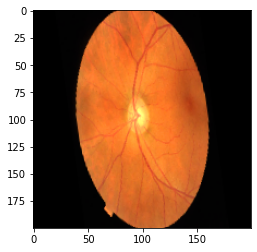

In [72]:
# Get a batch of images and labels
x_batch, y_batch = next(train_generator)

# Display the first image in the batch
plt.imshow(x_batch[-1])
plt.show()

In [73]:
# Create an instance of the VGG19 model with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [74]:
# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(28, activation='sigmoid')(x)

# freeze the convolutional layers of the VGG19 model
for layer in base_model.layers:
    layer.trainable = False

In [75]:
# Build and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=valid_generator, verbose=1)

Epoch 1/10
60/60 [==============================] - 297s 5s/step - loss: 0.2184 - accuracy: 0.1643 - val_loss: 0.1383 - val_accuracy: 0.1420
Epoch 2/10
60/60 [==============================] - 327s 5s/step - loss: 0.1568 - accuracy: 0.2205 - val_loss: 0.1347 - val_accuracy: 0.3580
Epoch 3/10
60/60 [==============================] - 368s 6s/step - loss: 0.1488 - accuracy: 0.2483 - val_loss: 0.1375 - val_accuracy: 0.2839
Epoch 4/10
60/60 [==============================] - 323s 5s/step - loss: 0.1426 - accuracy: 0.3045 - val_loss: 0.1321 - val_accuracy: 0.3628
Epoch 5/10
60/60 [==============================] - 344s 6s/step - loss: 0.1402 - accuracy: 0.3102 - val_loss: 0.1336 - val_accuracy: 0.4180
Epoch 6/10
60/60 [==============================] - 343s 6s/step - loss: 0.1418 - accuracy: 0.3076 - val_loss: 0.1313 - val_accuracy: 0.3912
Epoch 7/10
60/60 [==============================] - 303s 5s/step - loss: 0.1386 - accuracy: 0.3249 - val_loss: 0.1319 - val_accuracy: 0.3265
Epoch 8/10
60

In [19]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

20/20 [==============================] - 76s 4s/step - loss: 0.1248 - accuracy: 0.3661
Test accuracy: 0.36608558893203735
Test Loss: 0.12481249123811722


In [ ]:
acc = []
los = []
lr = 0.0001
epo= [1]

for j in range(1):
    
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(train_generator, epochs=epo[j], validation_data=valid_generator, verbose=1)
    test_loss, test_acc = model.evaluate(test_generator)
    acc.append(test_acc*100)
    los.append(test_loss*100)
    print('Test accuracy:', test_acc)
    print('Test Loss:', test_loss)

In [76]:
from sklearn.metrics import accuracy_score, log_loss, precision_score, f1_score, recall_score
import keras.backend as K

def evaluate_threshold(model, X, y, threshold):
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob >= threshold).astype(int)
    loss = log_loss(y, y_pred_prob)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='micro')
    precision = precision_score(y, y_pred, average='macro', zero_division=1)
    recall = recall_score(y, y_pred, average='micro')
    return loss, accuracy, f1, precision, recall

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

acc = []
los = []
pres =[]
f1a = []
rec = []
lr = 0.0001
epo= [5]
threshold = 0.2

for j in range(1):
    
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
    history = model.fit(train_generator, epochs=epo[j], validation_data=valid_generator, callbacks=[earlystop], verbose=1)
    loss, accuracy, f1, precision, recall = evaluate_threshold(model, test_generator, test_generator.labels, threshold)
    acc.append(accuracy)
    los.append(loss)
    pres.append(precision)
    f1a.append(f1)
    rec.append(recall)

Epoch 1/5
60/60 [==============================] - ETA: 0s - loss: 0.2747 - accuracy: 0.0782

KeyboardInterrupt: 

In [57]:
print(acc,pres,rec,f1,los)

[0.20126782884310618] [1.0] [0.0] 0.0 [3.0473106643244825]


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Define thresholds to evaluate
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize lists to store accuracy and loss for each threshold
acc_scores = []
loss_scores = []

for t in thresholds:
    # Generate predictions for test set using the threshold
    y_pred = (model.predict(test_generator) > t).astype(int)
    
    # Calculate accuracy and loss using evaluate method
    scores = model.evaluate(test_generator)
    acc_scores.append(scores[1])
    loss_scores.append(scores[0])
    
    # Calculate and print AUC score
    auc_score = roc_auc_score(test_generator.classes, y_pred)
    print(f"Threshold: {t}, AUC score: {auc_score}")

# Print accuracy and loss for each threshold
for i, t in enumerate(thresholds):
    print(f"Threshold: {t}, Accuracy: {acc_scores[i]}, Loss: {loss_scores[i]}")

[39.77813124656677, 39.619651436805725, 29.477021098136902] [13.316327333450317, 13.257323205471039, 13.258014619350433]


<Figure size 432x288 with 0 Axes>

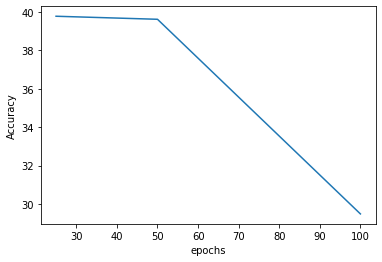

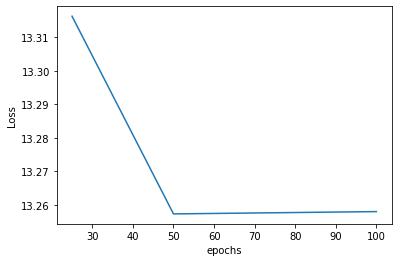

<Figure size 432x288 with 0 Axes>

In [25]:
print(acc,los)
plt.plot(epo,acc)
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.figure()
plt.plot(epo,los)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.figure()

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Get predicted probabilities on test set
y_pred = model.predict(test_generator)

# Calculate fpr, tpr and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = list(test_generator.class_indices.keys())
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(test_generator.labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_generator.labels.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10,10))
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


20/20 [==============================] - 69s 3s/step


AttributeError: 'DataFrameIterator' object has no attribute 'class_indices'

In [33]:
# Define the parameter grid for GridSearchCV
param_grid = {'threshold': np.arange(0.5, 1, 0.1),
              'lr': [0.0001, 0.001, 0.1]}

# Define the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(train_generator)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

TypeError: Cannot clone object '<keras.engine.functional.Functional object at 0x00000205C6712670>' (type <class 'keras.engine.functional.Functional'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.